In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv(r'train_hr.csv', index_col=0,header = 0)
data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [50]:
data.drop("gender",axis=1,inplace=True)

department                 0
region                     0
education               2409
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


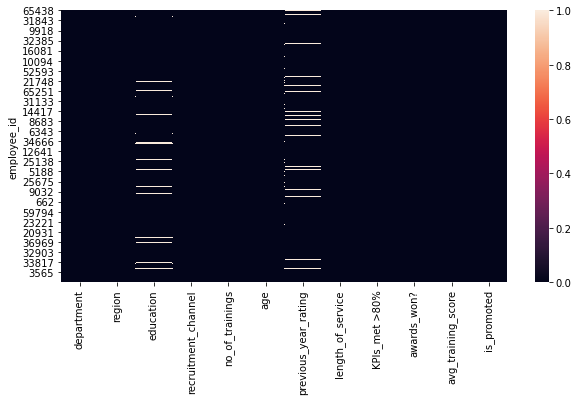

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull())
print(data.isnull().sum())

In [52]:
data["education"].fillna(data["education"].mode()[0],inplace=True)
data["previous_year_rating"].fillna(0,inplace=True)

In [53]:
col= ['department','region', 'education','recruitment_channel']
col

['department', 'region', 'education', 'recruitment_channel']

In [54]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in col:
    data[x]=le.fit_transform(data[x])
data.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,
65438,7,31,2,2,1,35,5.0,8,1,0,49,0
65141,4,14,0,0,1,30,5.0,4,0,0,60,0
7513,7,10,0,2,1,34,3.0,7,0,0,50,0
2542,7,15,0,0,2,39,1.0,10,0,0,50,0
48945,8,18,0,0,1,45,3.0,2,0,0,73,0


In [55]:
X = data.drop("is_promoted",axis=1)
Y = data["is_promoted"]
X.columns

Index(['department', 'region', 'education', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3 ,random_state = 10 )

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=19, metric='euclidean')
#fit the model on the data and predict the values
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(f"Matrix:{confusion_matrix(y_test,pred)}")
print(f"acc:{accuracy_score(y_test,pred)}")
print(f"{classification_report(y_test,pred)}")

Matrix:[[15029    35]
 [ 1255   124]]
acc:0.9215471629264733
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15064
           1       0.78      0.09      0.16      1379

    accuracy                           0.92     16443
   macro avg       0.85      0.54      0.56     16443
weighted avg       0.91      0.92      0.89     16443



In [59]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,random_state=10)
RF.fit(X_train,y_train)
pred=RF.predict(X_test)
print(f"Matrix:{confusion_matrix(y_test,pred)}\n")
print(f"acc:{accuracy_score(y_test,pred)}\n")
print(f"{classification_report(y_test,pred)}")

Matrix:[[14955   109]
 [  961   418]]

acc:0.934926716535912

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     15064
           1       0.79      0.30      0.44      1379

    accuracy                           0.93     16443
   macro avg       0.87      0.65      0.70     16443
weighted avg       0.93      0.93      0.92     16443



In [60]:
data.is_promoted.value_counts() ##resampling

0    50140
1     4668
Name: is_promoted, dtype: int64

In [62]:
from sklearn.utils import resample
# Separate majority and minority classes
majority = data[data.is_promoted==0]
minority = data[data.is_promoted==1]
 
# Upsample minority class
minority_upsampled = resample(minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=50140,    # to match majority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])
# Display new class counts
upsampled.is_promoted.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

In [63]:
X = upsampled.drop("is_promoted",axis=1)
Y = upsampled["is_promoted"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3 ,random_state = 10 )
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
RF=RandomForestClassifier(n_estimators=100,random_state=10)
RF.fit(X_train,y_train)
pred=RF.predict(X_test)
print(f"Matrix:{confusion_matrix(y_test,pred)}\n")
print(f"acc:{accuracy_score(y_test,pred)}\n")
print(f"{classification_report(y_test,pred)}")

Matrix:[[14412   603]
 [    0 15069]]

acc:0.9799561228560032

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15015
           1       0.96      1.00      0.98     15069

    accuracy                           0.98     30084
   macro avg       0.98      0.98      0.98     30084
weighted avg       0.98      0.98      0.98     30084



In [66]:
test  = pd.read_csv('test_hr.csv',index_col=0,header = 0)
test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,,
8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50


In [67]:
test.drop("gender",axis=1,inplace=True)
test["education"].fillna(test["education"].mode()[0],inplace=True)
test["previous_year_rating"].fillna(0,inplace=True)
colname = ['department',
          'region', 'education',
          'recruitment_channel']
colname
for x in colname:
     test[x]=le.fit_transform(test[x])

In [69]:
test.head()

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
employee_id,,,,,,,,,,,
8724,8,18,0,2,1,24,0.0,1,1,0,77
74430,2,28,0,0,1,31,3.0,5,0,0,51
72255,7,4,0,0,1,31,1.0,4,0,0,47
38562,5,11,0,0,3,31,2.0,9,0,0,65
64486,1,21,0,2,1,30,4.0,7,0,0,61


In [70]:
test = scaler.fit_transform(test)
tpred=RF.predict(test)
print(f"Matrix:{confusion_matrix(y_test,pred)}\n")
print(f"acc:{accuracy_score(y_test,pred)}\n")
print(f"{classification_report(y_test,pred)}")

Matrix:[[14412   603]
 [    0 15069]]

acc:0.9799561228560032

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15015
           1       0.96      1.00      0.98     15069

    accuracy                           0.98     30084
   macro avg       0.98      0.98      0.98     30084
weighted avg       0.98      0.98      0.98     30084



In [82]:
test=pd.read_csv('test_hr.csv')
final = pd.DataFrame({"Id": test["employee_id"],"status":[("Promoted" if tpred[i] == 1 else "Not Promoted") for i,p in enumerate(tpred)]})
final

,Id,status
0,8724,Not Promoted
1,74430,Not Promoted
2,72255,Not Promoted
3,38562,Not Promoted
4,64486,Not Promoted
...,...,...
23485,53478,Not Promoted
23486,25600,Not Promoted
23487,45409,Not Promoted
23488,1186,Not Promoted


In [90]:
final.status.value_counts()

Not Promoted    20374
Promoted         3116
Name: status, dtype: int64